## Visualize KDE kernels in the Scikit-learn Package

In [1]:
import os

os.chdir('..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

from src.utils import visualization as viz


def format_func(x, loc):
    if x == 0:
        return '0'
    elif x == 1:
        return 'h'
    elif x == -1:
        return '-h'
    else:
        return f'{x:.0f}h'

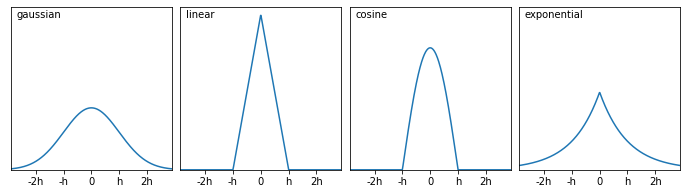

In [3]:
# plot kernels
X = np.linspace(-6, 6, 1000)[:, None]

fig, axs = viz.create_fig(ncols=4, colsize=3, rowsize=3)
fig.subplots_adjust(wspace=0.05)

for ax, kernel in zip(axs, ['gaussian', 'linear', 'cosine', 'exponential']):
    log_dens = KernelDensity(kernel=kernel).fit(np.zeros((1, 1))).score_samples(X)
    ax.plot(X[:, 0], np.exp(log_dens))
    ax.text(-2.7, 0.98, kernel)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    ax.xaxis.set_major_locator(plt.MultipleLocator(1))
    ax.yaxis.set_major_locator(plt.NullLocator())
    ax.set_ylim(0, 1.05)
    ax.set_xlim(-2.9, 2.9)
fig.savefig('figures/kernels.png', bbox_inches='tight')